Importing necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import json
import requests
import time
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

In [3]:
data = pd.read_csv("data/kc_house_data.csv")

In [4]:
df = pd.DataFrame(data)

In [5]:
len(df.columns)

21

In [6]:
len(df)

21597

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Investigating the data we can see high standard deviations for the square foot living space, square foot lot.  Mean price is $540296 with a std deviation of $367368 and a max value of $7.7 million.

In [8]:
df.drop_duplicates() #checking for duplicates, none found

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Investigating placeholder and nan values

In [9]:
col_list = list(df.columns)
for col in col_list:
    print(df[col].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
11/2/2014      1
3/8/2015       1
5/17/2014      1
5/24/2015      1
1/17/2015      1
Name: date, Length: 372, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.

In [10]:
df = df[df["sqft_basement"] != '?']

In [11]:
df["sqft_basement"] = df["sqft_basement"].astype(float)

In [12]:
df["date"] = df["date"].map(lambda date: datetime.strptime(date, '%m/%d/%Y'))

In [13]:
df['date']=df['date'].map(datetime.toordinal)

In [14]:
df["waterfront"] = df["waterfront"].astype(str)

In [15]:
df.drop(columns = "view", inplace = True)

Investigating distribution of variables

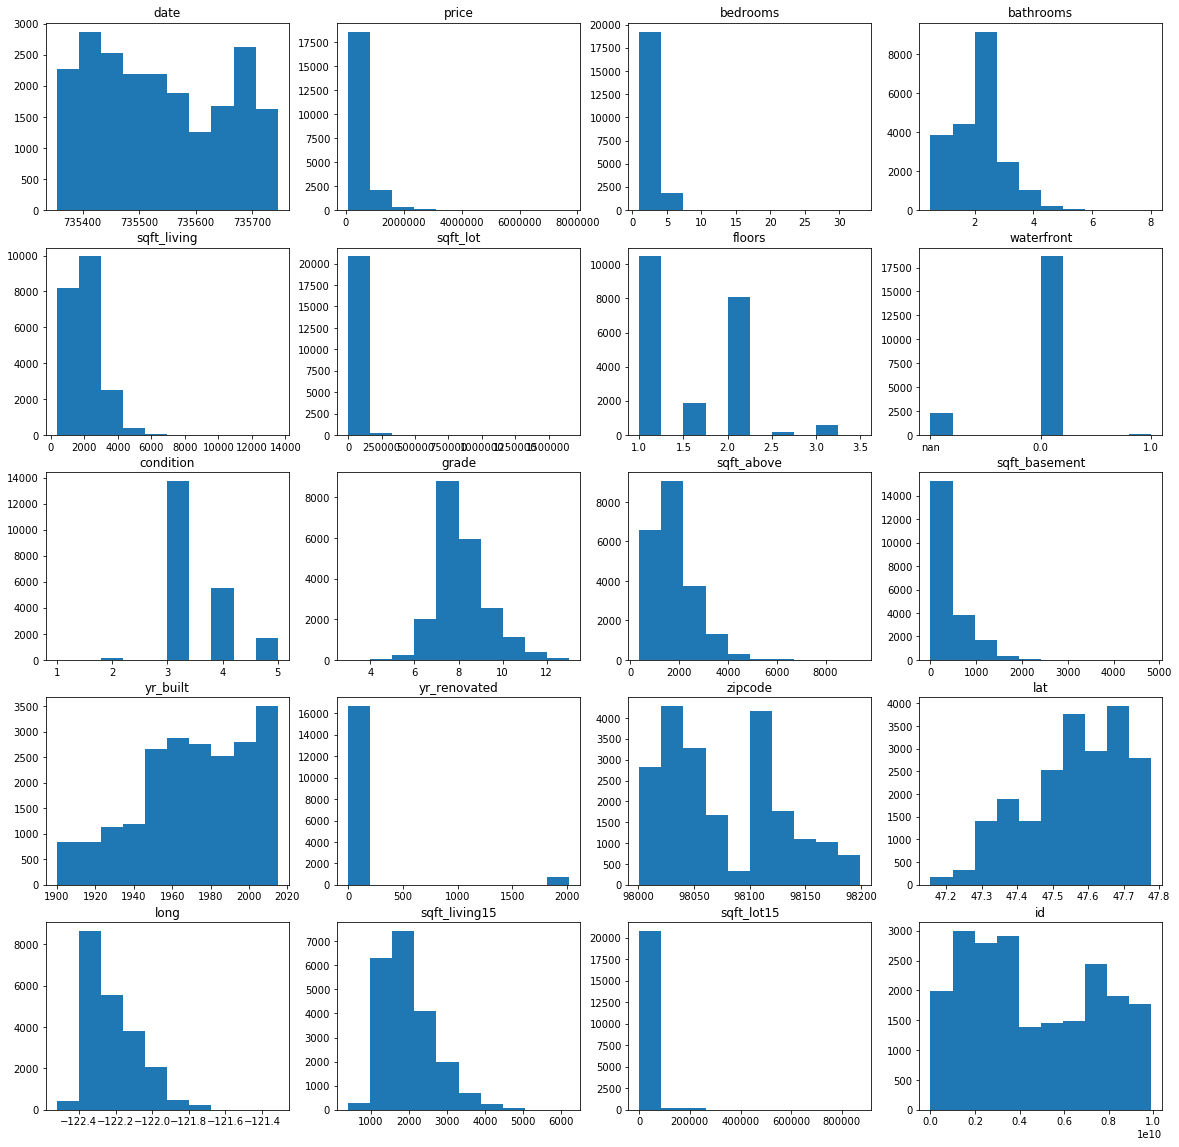

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
x = df.price
for n in range(len(df.columns)):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    y=df.iloc[:,n]
    ax.hist(y)
    ax.set_title(df.columns.values[n])
plt.show()   

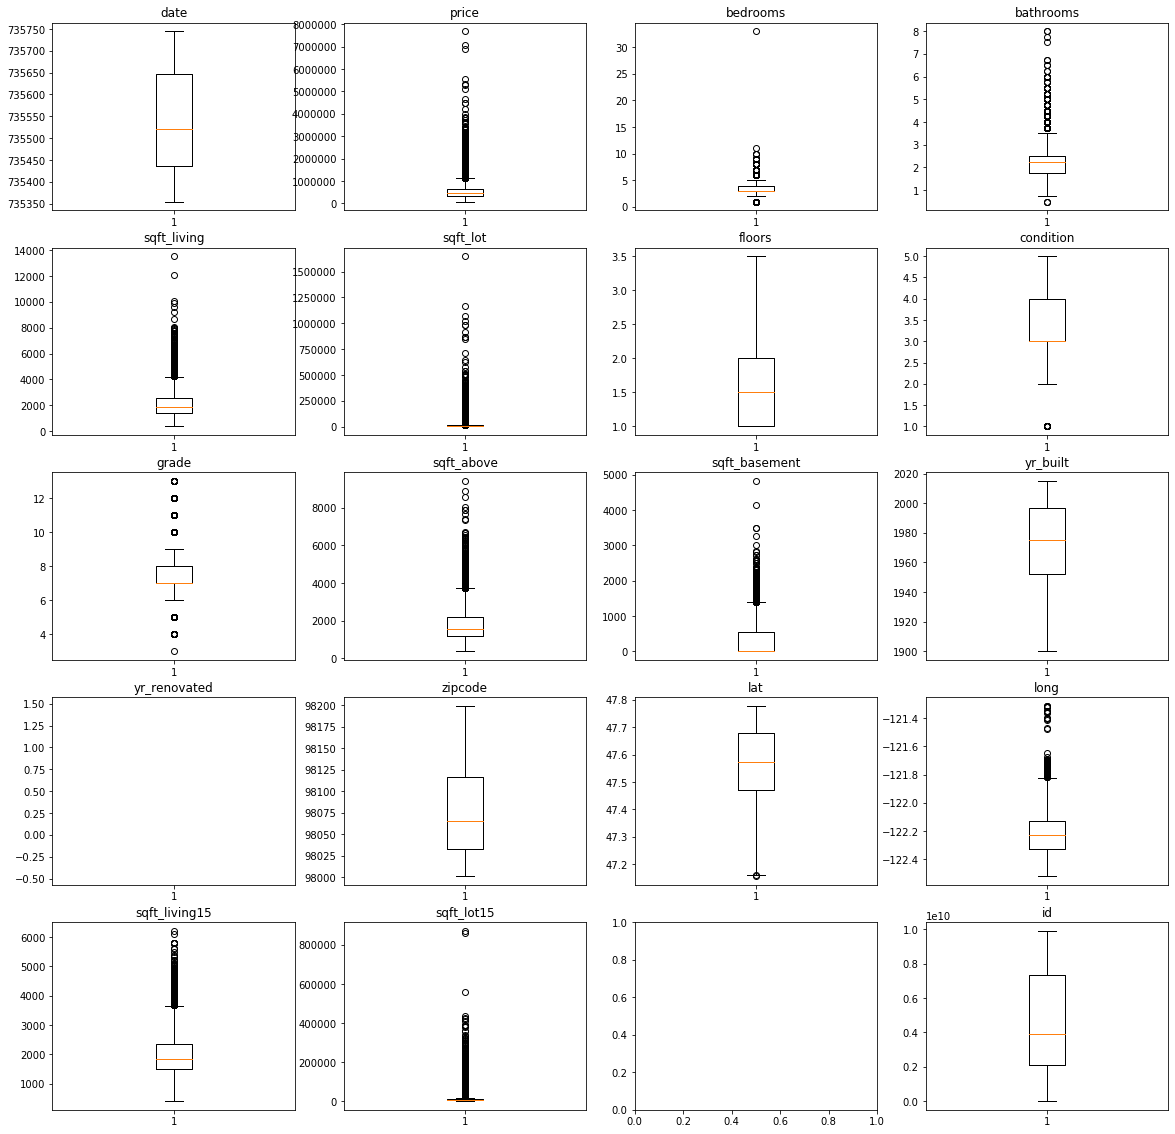

In [17]:
box_list = list(df.columns)
box_list.remove('waterfront')

fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
for n, column in enumerate(box_list):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    x=df[column]
    y=df.price
    ax.boxplot(x=x)
    ax.set_title(box_list[n])
plt.show()   

Box plots show significant outliers in the data possibly due to very large, expensive houses in the dataset.

Investigating independent vs dependent variable relationships via scatterplots

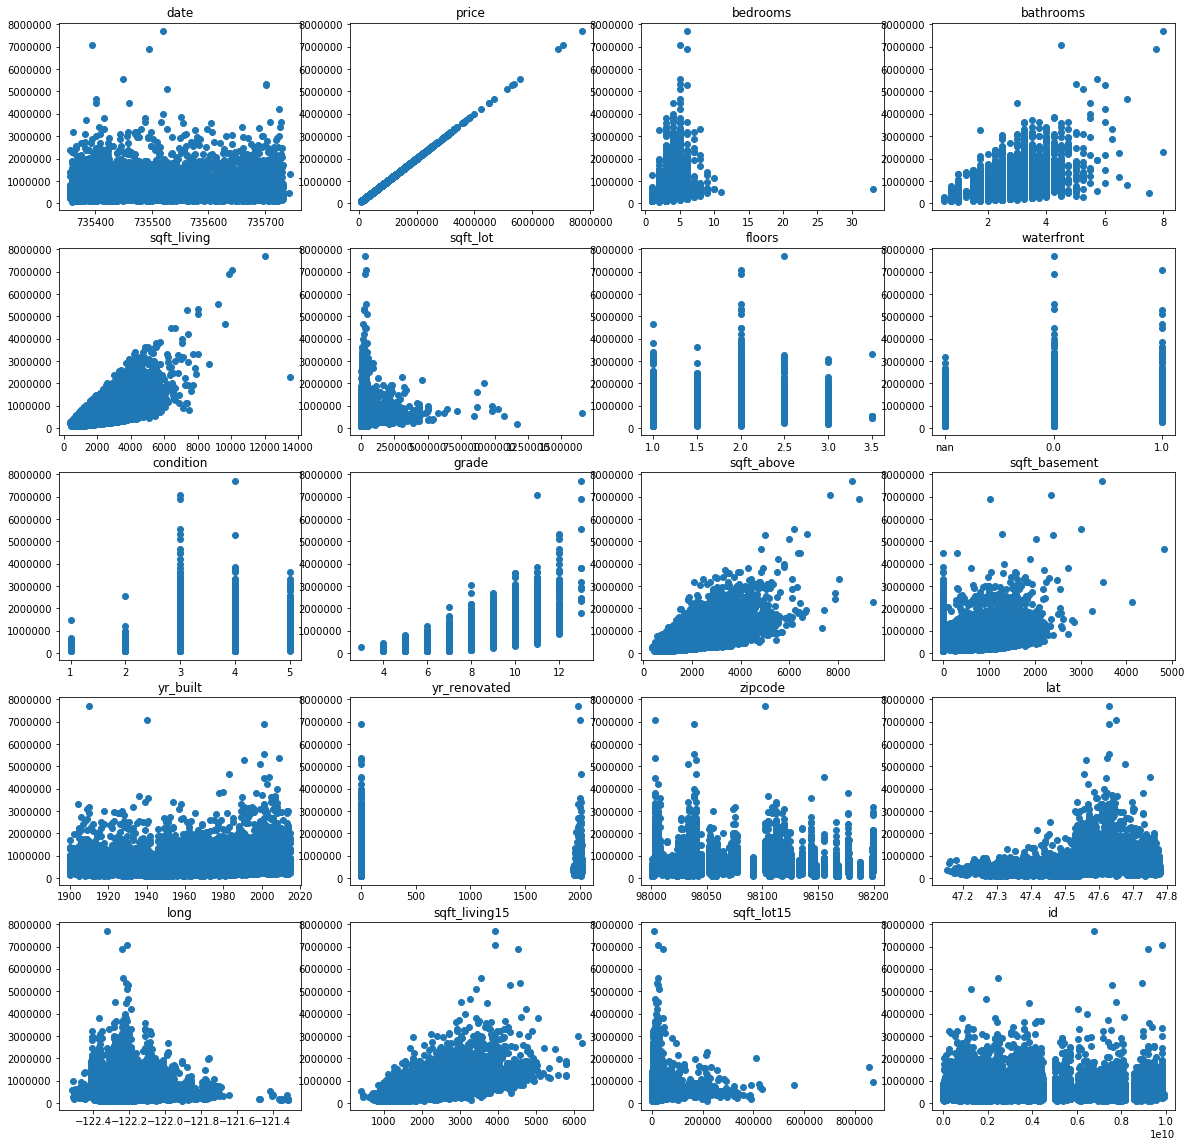

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
for n, column in enumerate(df.columns):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    x=df[column]
    y=df.price
    ax.scatter(x, y)
    ax.set_title(df.columns.values[n])
plt.show()   

Subsetting data for business case - luxury real estate agency looking for the housing attributes that appeal to wealthy people
i.e. What translates to higher listing prices in areas where wealthy people live.
We are luxury real estate company targeting high income buyers. We want to know what features these buyers look for in houses that translate to higher listing prices.

In [19]:
zips = pd.read_csv('data/top_30_zips.csv')
zips

,ZIP,returns,AGI,AGIperReturn
0,98039,1540.0,1808237.0,1174.179870
1,98040,12650.0,4405904.0,348.292806
2,98004,18840.0,6309943.0,334.922665
3,98112,12660.0,4202173.0,331.925197
4,98164,110.0,33940.0,308.545455
5,98134,480.0,121097.0,252.285417
6,98033,19980.0,4917685.0,246.130380
7,98075,10660.0,2564469.0,240.569325
8,98074,12680.0,2992892.0,236.032492
9,98077,6200.0,1416890.0,228.530645


In [34]:
fourteen_zips = list(zips.ZIP[:14])

In [46]:
df["zipcode"].value_counts()

98103    588
98038    574
98115    568
98052    562
98042    542
        ... 
98102    100
98010     98
98024     79
98148     55
98039     49
Name: zipcode, Length: 70, dtype: int64

In [35]:
df_top_zip = df[df["zipcode"].isin(fourteen_zips)]

In [36]:
df_top_zip.shape

(3192, 20)

Checking the distribution of the subset

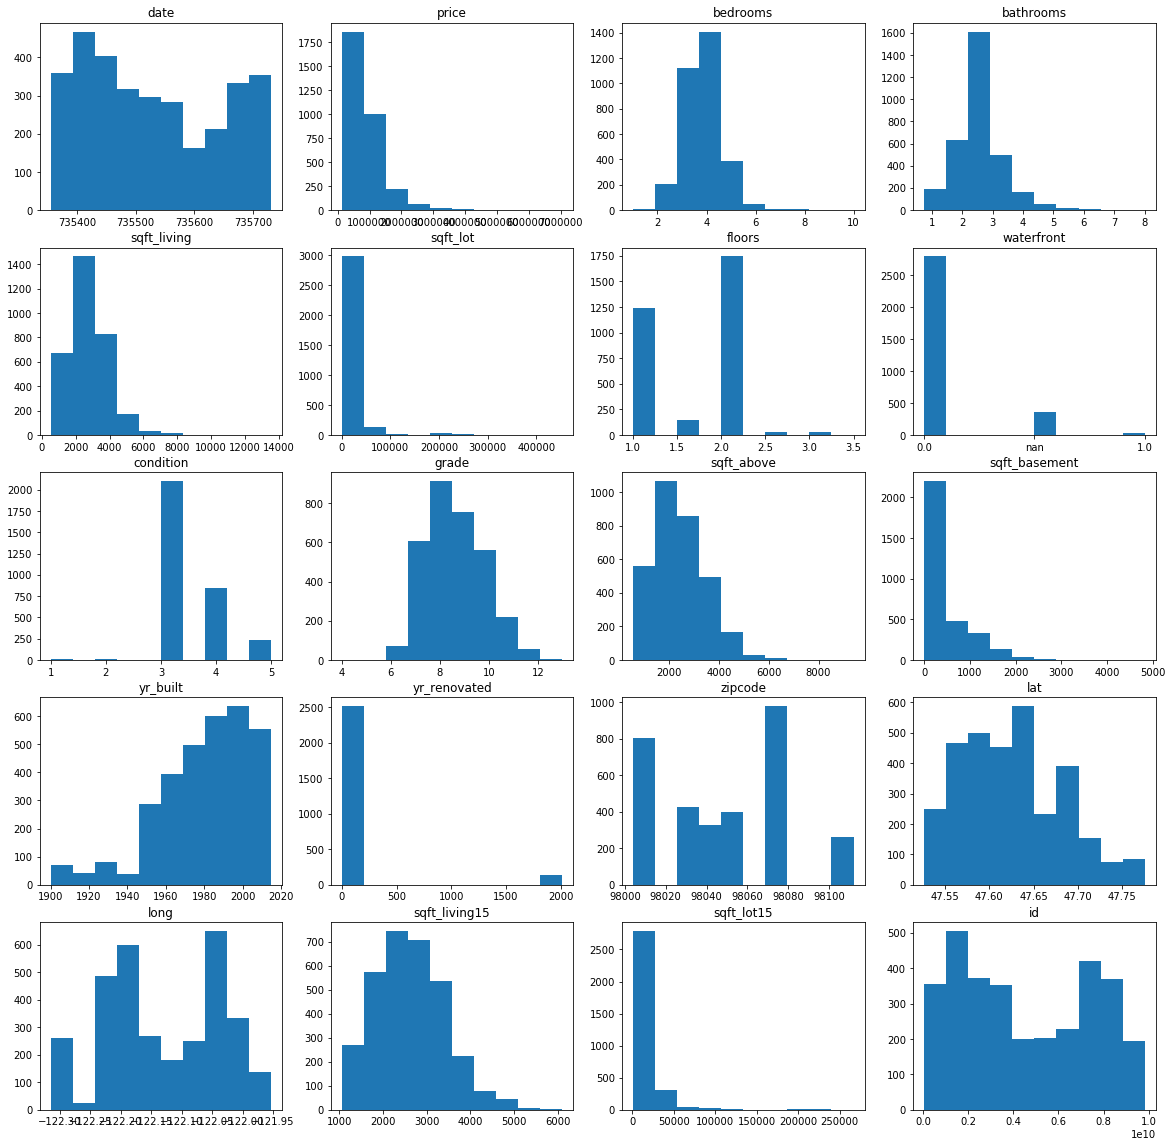

In [39]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
x = df_top_zip.price
for n in range(len(df_top_zip.columns)):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    y=df_top_zip.iloc[:,n]
    ax.hist(y)
    ax.set_title(df_top_zip.columns.values[n])
plt.show()   

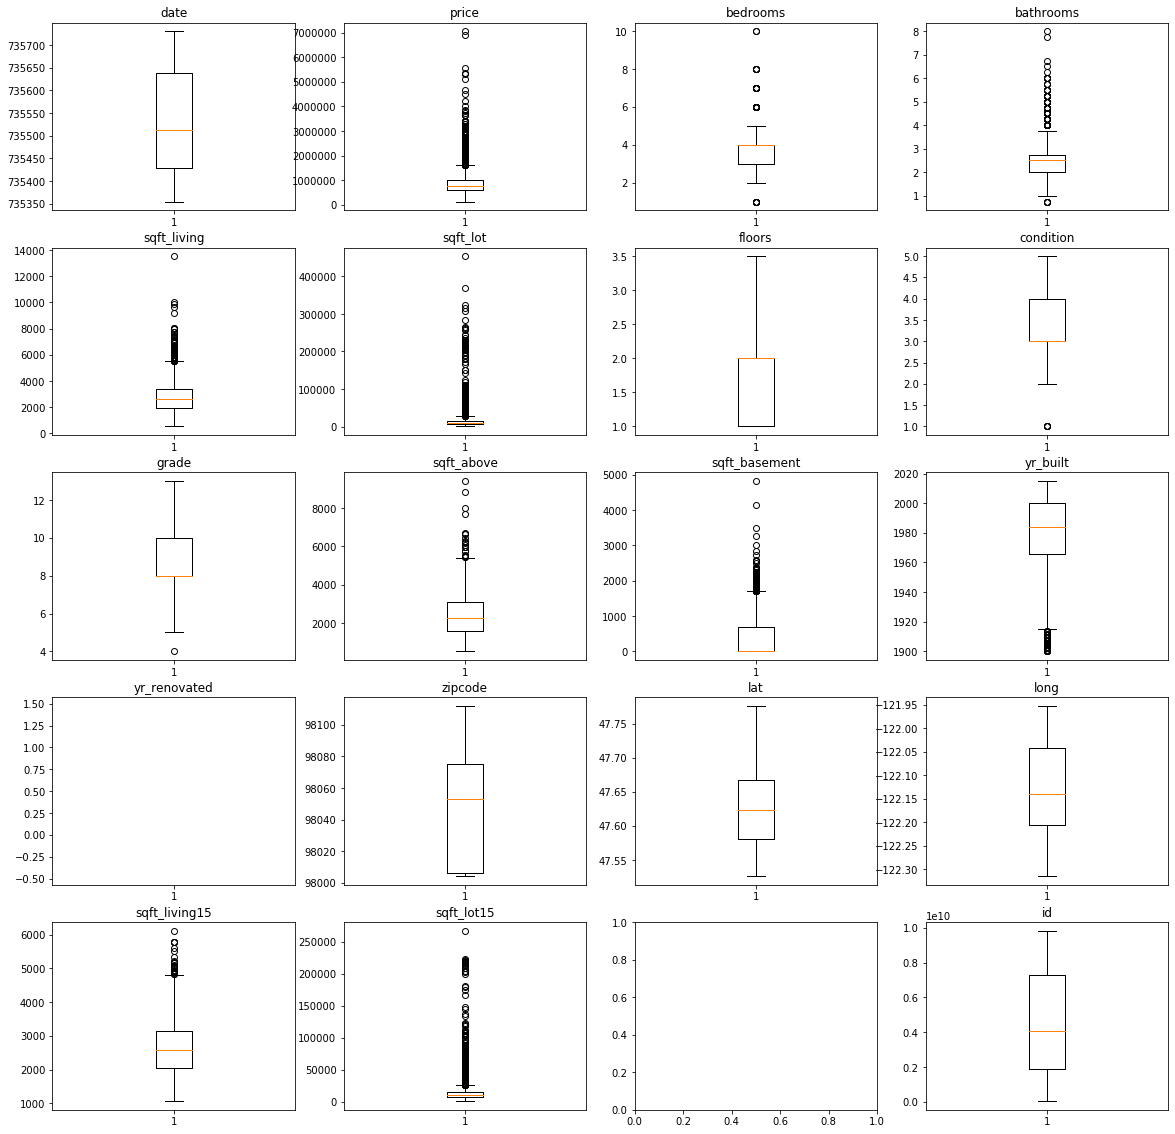

In [40]:
box_list = list(df_top_zip.columns)
box_list.remove('waterfront')

fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
for n, column in enumerate(box_list):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    x=df_top_zip[column]
#     y=df.price
    ax.boxplot(x=x)
    ax.set_title(box_list[n])
plt.show()   

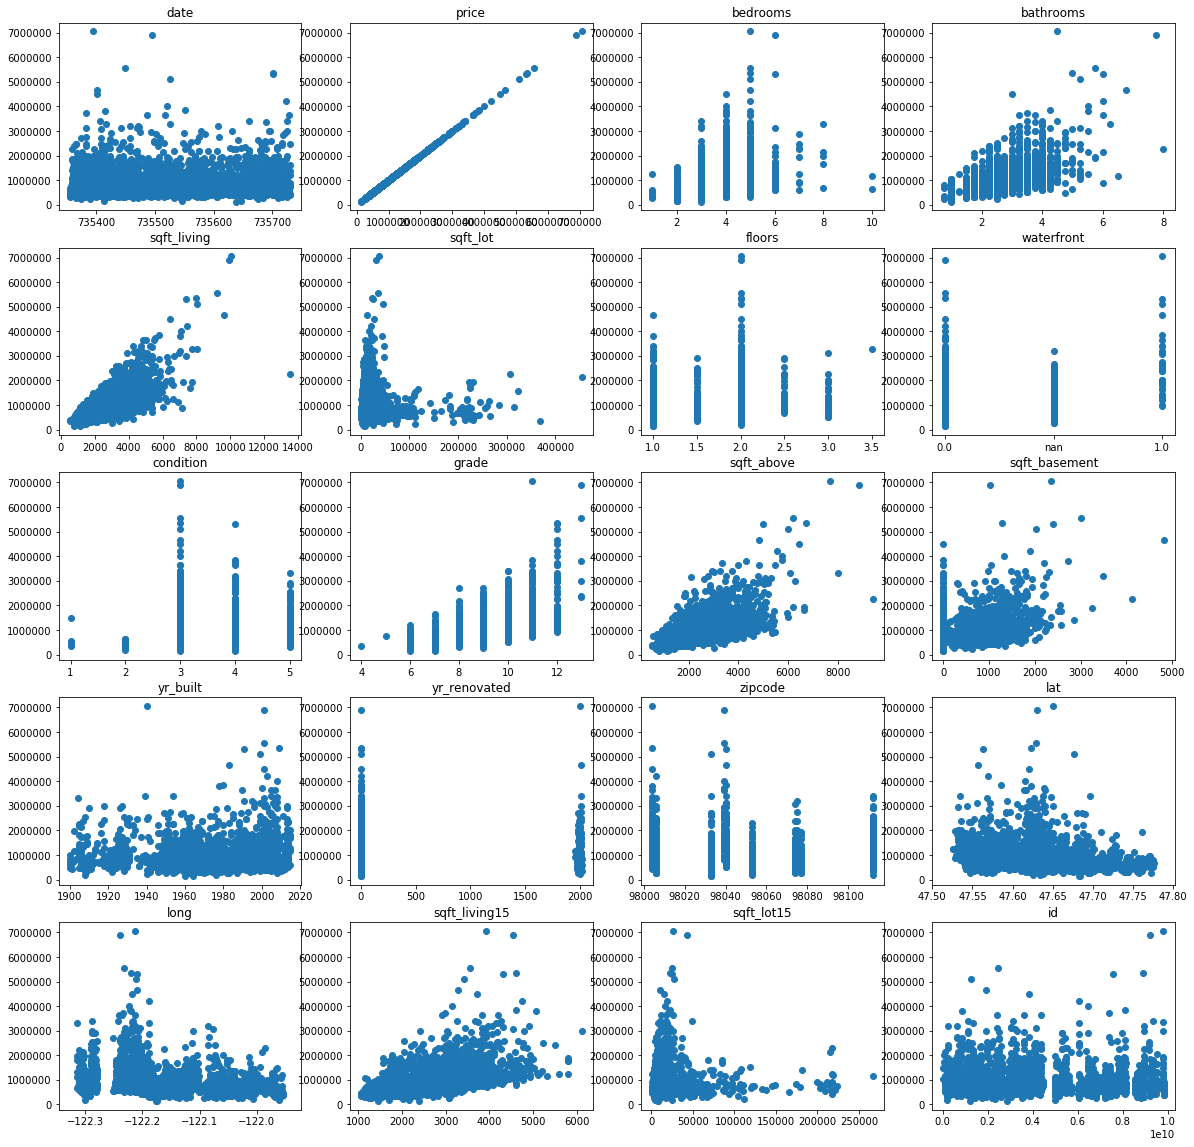

In [37]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
for n, column in enumerate(df_top_zip.columns):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    x=df_top_zip[column]
    y=df_top_zip.price
    ax.scatter(x, y)
    ax.set_title(df_top_zip.columns.values[n])
plt.show()   

Investigating multicollinearity

In [41]:
correlation_df = df_top_zip.corr()
correlation_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.004197,-0.072561,-0.097088,-0.048326,-0.087069,-0.212432,-0.030574,-0.053810,-0.048444,-0.083656,-0.022469,0.095123,-0.027294,0.037869,0.007965,0.071681,-0.091226,-0.210786
date,0.004197,1.000000,0.028610,-0.027630,-0.020767,-0.028695,0.005349,-0.021416,-0.031237,-0.013869,-0.026779,-0.008867,-0.000988,-0.045072,-0.020273,0.014711,-0.011753,-0.008908,0.006759
price,-0.072561,0.028610,1.000000,0.370082,0.601021,0.725306,0.047001,0.215821,0.025737,0.615902,0.597040,0.371540,0.023982,0.142075,-0.136483,-0.169639,-0.347710,0.525086,0.038250
bedrooms,-0.097088,-0.027630,0.370082,1.000000,0.520524,0.577827,0.047149,0.235819,0.021688,0.392482,0.471902,0.302899,0.066424,0.018856,-0.094527,-0.222303,-0.075676,0.414127,0.061008
bathrooms,-0.048326,-0.020767,0.601021,0.520524,1.000000,0.803328,0.102307,0.441975,-0.164291,0.685504,0.716726,0.309084,0.406146,0.029782,-0.010975,-0.128821,0.042740,0.549592,0.094366
sqft_living,-0.087069,-0.028695,0.725306,0.577827,0.803328,1.000000,0.198010,0.413557,-0.126011,0.787340,0.871379,0.423196,0.303950,0.016518,-0.049848,-0.155642,0.025892,0.715847,0.190337
sqft_lot,-0.212432,0.005349,0.047001,0.047149,0.102307,0.198010,1.000000,0.034593,-0.046774,0.113314,0.211058,0.012666,0.057087,-0.001842,0.067545,0.198696,0.253471,0.175589,0.805072
floors,-0.030574,-0.021416,0.215821,0.235819,0.441975,0.413557,0.034593,1.000000,-0.304394,0.476624,0.611760,-0.289251,0.396076,-0.059928,0.253490,0.002162,0.134946,0.317765,0.045789
condition,-0.053810,-0.031237,0.025737,0.021688,-0.164291,-0.126011,-0.046774,-0.304394,1.000000,-0.201122,-0.251023,0.207472,-0.438029,-0.050418,-0.180276,-0.172372,-0.320243,-0.089197,-0.051811
grade,-0.048444,-0.013869,0.615902,0.392482,0.685504,0.787340,0.113314,0.476624,-0.201122,1.000000,0.777299,0.164724,0.399951,-0.040987,0.001298,-0.181413,0.052870,0.695382,0.117474


In [42]:
correlation_df.applymap(lambda val: abs(val) >= 0.75)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
date,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False


In [43]:
corr_data = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_data[corr_data[0] < 1][:20]

,level_0,level_1,0
195,sqft_above,sqft_living,0.876678
105,sqft_living,sqft_above,0.876678
104,sqft_living,grade,0.763101
176,grade,sqft_living,0.763101
328,sqft_living15,sqft_living,0.756389
112,sqft_living,sqft_living15,0.756389
181,grade,sqft_above,0.756382
199,sqft_above,grade,0.756382
99,sqft_living,bathrooms,0.755278
81,bathrooms,sqft_living,0.755278


It appears that there is strong correlation between:
 - sqft living/sqft above
 - sqft living/grade
 - sqft living 15/sqft living
 - grade/sqft above
 - bathrooms/sqft living

Further investigating multicollinearity of subset of independent variables

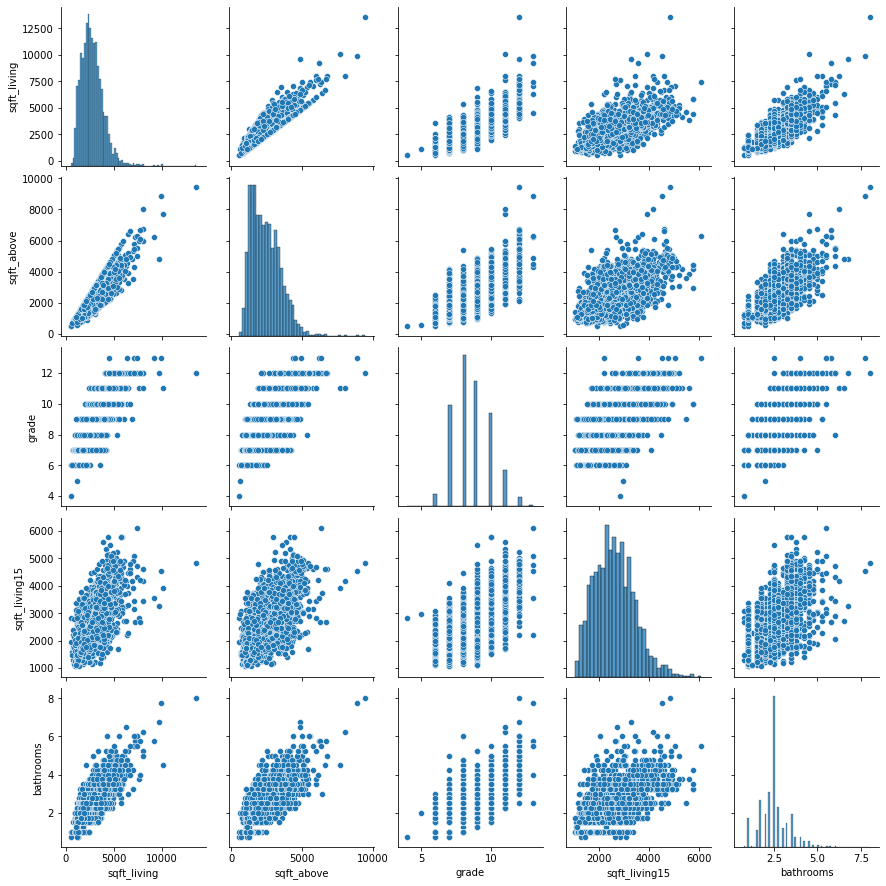

In [44]:
sns.pairplot(df_top_zip[["sqft_living", "sqft_above", "grade", "sqft_living15", "bathrooms"]])

Creating dummy variables for categorical data so they can be read into model

In [45]:
categorical = ["waterfront", "condition", "grade", "floors", "bedrooms", "zipcode"]
continuous = ["id", "date", "price", "bathrooms", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built", "lat", "long", "sqft_living15", "sqft_lot15"]

** year renovated was not included in categorical list, as it was added manually as a dummy variable

Creating dummy variables for year renovated

In [46]:
df_top_zip["reno_2000_over"] = df_top_zip["yr_renovated"].map(lambda year: 1 if year >= 2000 else 0)

C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_top_zip["reno_1980_2000"] = df_top_zip["yr_renovated"].map(lambda year: 1 if (year >= 1980 and year < 2000) else 0)

C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_top_zip["reno_1960_1980"] = df_top_zip["yr_renovated"].map(lambda year: 1 if (year >= 1960 and year < 1980) else 0)

C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_top_zip["reno_1940_1960"] = df_top_zip["yr_renovated"].map(lambda year: 1 if (year >= 1940 and year < 1960) else 0)

C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_top_zip["reno_1920_1940"] = df_top_zip["yr_renovated"].map(lambda year: 1 if (year >= 1920 and year < 1940) else 0)

C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_top_zip["reno_never"] = df_top_zip["yr_renovated"].map(lambda year: 1 if year == 0 else 0)

C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_top_zip["yr_renovated"].fillna("nan")

4          0
5          0
13         0
21         0
27         0
        ... 
21536      0
21552      0
21574      0
21583    nan
21584      0
Name: yr_renovated, Length: 3192, dtype: object

In [53]:
df_top_zip["reno_nan"] = df_top_zip["yr_renovated"].map(lambda year:  1 if np.isnan(year) else 0)

C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_nona = df_top_zip.drop(columns = ["yr_renovated", "reno_nan"])

In [55]:
df_cat = pd.DataFrame([])

for col in categorical:
    df_cat = pd.concat([df_cat, pd.get_dummies(df_nona[col], prefix= col[:3], drop_first=True)], axis=1)

In [56]:
df_cat

,wat_1.0,wat_nan,con_2,con_3,con_4,con_5,gra_5,gra_6,gra_7,gra_8,...,bed_10,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
21,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
27,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21536,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21552,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21574,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21583,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
df_joined = pd.concat([df_nona, df_cat], axis=1)

In [58]:
df_joined.drop(columns = categorical, axis=1, inplace = True)

Exporting data to csv

In [60]:
df_joined.to_csv("data/df_joined.csv", index=False)

In [61]:
y = df_joined.price
X = df_joined.drop(columns = "price", axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [65]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train ,X_int).fit()
summary = model.summary()
summary

C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     219.6
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:11:55   Log-Likelihood:                -35121.
No. Observations:                2553   AIC:                         7.035e+04
Df Residuals:                    2500   BIC:                         7.066e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.579e+08    4.1e+07    -11.173      0.000   -5.38e+08   -3.78e+08
id              2.032e-06   1.71e-06      1.186      0.236   -1.33e-06    5.39e-06
date             184.9599     40.718      4.542      0.000     105.116     264.804
bathrooms       4.331e+04   1.07e+04      4.063      0.000    2.24e+04    6.42e+04
sqft_living      139.3374      6.558     21.246      0.000     126.477     152.198
sqft_lot          -0.0040      0.244     -0.016      0.987      -0.483       0.475
sqft_above       114.3528      6.777     16.874      0.000     101.064     127.641
sqft_basement     25.0255      7.386      3.388      0.001      10.542      39.509
yr_built        1077.5481    350.591      3.074      0.002     390.069    1765.028
lat             1.771e+06   3.09e+05      5.738      0.000    1.17e+06    2.38e+06
long           -1.931e+06   2.33e+05     -8.278      0.000   -2.39e+06   -1.47e+06
sqft_living15     47.2564      9.547      4.950      0.000      28.536      65.976
sqft_lot15        -0.0137      0.343     -0.040      0.968      -0.687       0.659
reno_2000_over  2.389e+05   3.32e+04      7.186      0.000    1.74e+05    3.04e+05
reno_1980_2000  7.217e+04   4.25e+04      1.699      0.089   -1.11e+04    1.55e+05
reno_1960_1980 -4.482e+04   7.67e+04     -0.585      0.559   -1.95e+05    1.06e+05
reno_1940_1960  7.924e+04   1.67e+05      0.476      0.634   -2.47e+05    4.06e+05
reno_1920_1940  2.238e-07   1.05e-06      0.214      0.831   -1.83e-06    2.28e-06
reno_never     -1.588e+04   1.25e+04     -1.275      0.203   -4.03e+04    8545.777
wat_1.0         1.274e+06   4.87e+04     26.161      0.000    1.18e+06    1.37e+06
wat_nan        -6033.3687   1.43e+04     -0.422      0.673   -3.41e+04     2.2e+04
con_2          -6.612e+04   1.29e+05     -0.512      0.609   -3.19e+05    1.87e+05
con_3          -1.211e+04   1.04e+05     -0.116      0.908   -2.17e+05    1.93e+05
con_4            1.55e+04   1.04e+05      0.149      0.882   -1.89e+05     2.2e+05
con_5           1.293e+05   1.05e+05      1.229      0.219    -7.7e+04    3.36e+05
gra_5           2.571e+05   3.44e+05      0.747      0.455   -4.17e+05    9.32e+05
gra_6          -1.108e+05   2.55e+05     -0.434      0.665   -6.12e+05     3.9e+05
gra_7          -1.603e+05   2.54e+05     -0.630      0.528   -6.59e+05    3.38e+05
gra_8          -1.571e+05   2.54e+05     -0.618      0.537   -6.56e+05    3.42e+05
gra_9           -9.87e+04   2.55e+05     -0.388      0.698   -5.98e+05    4.01e+05
gra_10         -4.138e+04   2.55e+05     -0.162      0.871   -5.42e+05    4.59e+05
gra_11          9.149e+04   2.56e+05      0.357      0.721    -4.1e+05    5.93e+05
gra_12          4.599e+05   2.59e+05      1.778      0.076   -4.73e+04    9.67e+05
gra_13           1.25e+06   2.83e+05      4.414      0.000    6.95e+05     1.8e+06
flo_1.5     

In [66]:
y_hat = model.predict()
train_rmse = mean_squared_error(y_train,y_hat)**.5
train_rmse

228119.88113034918

In [67]:
p_table = summary.tables[1]
p_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,-4.579e+08,4.1e+07,-11.173,0.000,-5.38e+08,-3.78e+08
id,2.032e-06,1.71e-06,1.186,0.236,-1.33e-06,5.39e-06
date,184.9599,40.718,4.542,0.000,105.116,264.804
bathrooms,4.331e+04,1.07e+04,4.063,0.000,2.24e+04,6.42e+04
sqft_living,139.3374,6.558,21.246,0.000,126.477,152.198
sqft_lot,-0.0040,0.244,-0.016,0.987,-0.483,0.475
sqft_above,114.3528,6.777,16.874,0.000,101.064,127.641
sqft_basement,25.0255,7.386,3.388,0.001,10.542,39.509
yr_built,1077.5481,350.591,3.074,0.002,390.069,1765.028
lat,1.771e+06,3.09e+05,5.738,0.000,1.17e+06,2.38e+06


Check normality assumption with QQ plot

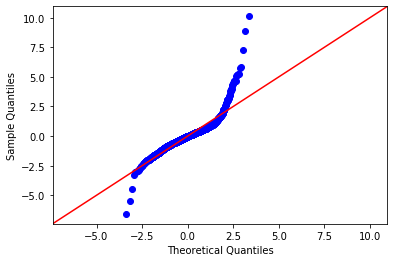

In [71]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

This QQ plot indicates that our data has very heavy tails compared to a normal distribution of residuals.

In [72]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name, test))

[('Jarque-Bera', 17707.28323529844),
 ('Prob', 0.0),
 ('Skew', 1.5354146129434456),
 ('Kurtosis', 15.531199258182275)]

The Jarque-Bera result is very high indicating that our results are not normally distributed.

Next we will check for homoscedasticity.

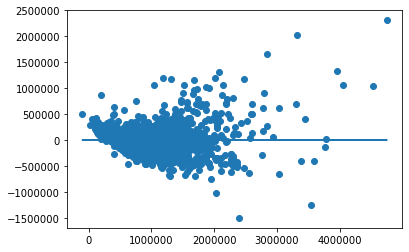

In [73]:
plt.scatter(model.predict(X_int), model.resid)
plt.plot(model.predict(X_int), [0 for i in range(len(X_int))]);

This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

In [68]:
p_table_df = pd.DataFrame(p_table.data)
p_table_df.columns=['column','coef','std err','t','P>|t|','0.025','0.975']
p_table_df.drop(labels=0,axis=0,inplace=True)
p_table_df.set_index('column',inplace=True)
p_table_df['P>|t|'] = p_table_df['P>|t|'].astype(float)
p_table_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, const to zip_98112
Data columns (total 6 columns):
coef       56 non-null object
std err    56 non-null object
t          56 non-null object
P>|t|      56 non-null float64
0.025      56 non-null object
0.975      56 non-null object
dtypes: float64(1), object(5)
memory usage: 3.1+ KB


In [69]:
p_table_df['pass']=p_table_df['P>|t|'].map(lambda x: x<=.05)
pass_list=list(p_table_df[p_table_df['pass']==True].index)
pass_list

['const',
 'date',
 'bathrooms',
 'sqft_living',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'reno_2000_over',
 'wat_1.0',
 'gra_13',
 'flo_1.5',
 'flo_2.0',
 'flo_3.0',
 'zip_98006',
 'zip_98033',
 'zip_98039',
 'zip_98040',
 'zip_98053',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98112']

In [70]:
len(pass_list)

25

Of our 55 number of independent variables, 25 have significantly low p-values so we can reject the null hypothesis that there is no relationship between these variables and the dependent variable.

In [78]:
pass_list.remove('const')
trained2 = X_train[pass_list]

In [81]:
trained2.corr().applymap(lambda val: abs(val) >= 0.75)

,date,bathrooms,sqft_living,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,reno_2000_over,...,flo_3.0,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112
date,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
long,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living15,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
reno_2000_over,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
corr_data = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_data[corr_data[0] < 1][:20]